<a href="https://colab.research.google.com/github/fadghom-22/UAS_DATAMINING/blob/main/dataminingfix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import **Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
import joblib
import json
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
warnings.filterwarnings('ignore')

### PreProcessing Data


Informasi Missing Values:
Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

 Total Data : 
(31, 7)

 kolom yang digunakan :
['Price', 'Open', 'High', 'Low']

 Data yang sudah dipreprocessing telah disimpan dalam file clean1.csv.

 Data baru  :



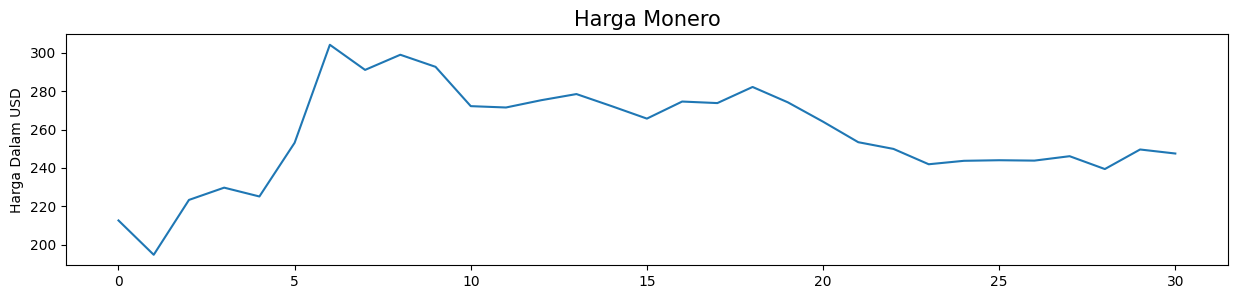

In [3]:
def preprocess_and_save(csv_file_path, required_columns, output_csv_file):
    dfa = pd.read_csv(csv_file_path)
    acleaned_df = dfa[required_columns]
    acleaned_df_reversed = acleaned_df[::-1]
    acleaned_df_reversed.to_csv('clean.csv', index=False, decimal='.')

    df = pd.read_csv(csv_file_path, thousands=',', decimal='.')
    cleaned_df = df[required_columns]  # Select only the desired columns
    cleaned_df_reversed = cleaned_df[::-1]  # Reverse the order of rows
    cleaned_df_reversed.to_csv(output_csv_file, index=False, decimal='.')

csv_file_path = 'bch.csv'
required_columns = ['Price', 'Open', 'High', 'Low']
output_csv_file = 'clean1.csv'

preprocess_and_save(csv_file_path, required_columns, output_csv_file)

df = pd.read_csv(csv_file_path)
df.head()
print("\nInformasi Missing Values:")
print(df.isnull().sum())
print("\n Total Data : ")
print(df.shape)
print("\n kolom yang digunakan :")
print(required_columns)
print(f"\n Data yang sudah dipreprocessing telah disimpan dalam file {output_csv_file}.")

print("\n Data baru  :\n")
newdata = 'clean1.csv'
dta = pd.read_csv(newdata)
plt.figure(figsize=(15,3))
plt.plot(dta['Price'])
plt.title('Harga Monero', fontsize=15)
plt.ylabel('Harga Dalam USD')
plt.show()

### Visualisasi Training Set Result


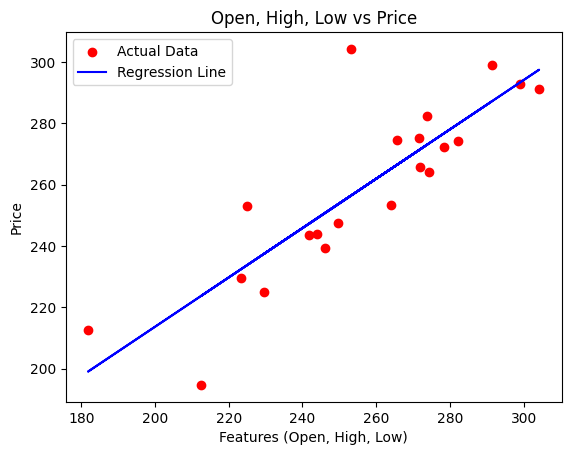

In [4]:
data = pd.read_csv('clean1.csv')
target_column = 'Price'
feature_columns = ['Open']
X = data[feature_columns]
y = data[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

plt.scatter(X_train, y_train, color='red', label='Actual Data')
plt.plot(X_train, regressor.predict(X_train), color='blue', label='Regression Line')
plt.title('Open, High, Low vs Price')
plt.xlabel('Features (Open, High, Low)')
plt.ylabel('Price')
plt.legend()
plt.show()


In [5]:
def train_and_save_model(csv_file_path, target_column, feature_columns, model_file):
    df = pd.read_csv(csv_file_path)
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].str.replace(',', '.').astype(float)
    data = df[[target_column] + feature_columns]
    X = data[feature_columns]
    y = data[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)
    model_dict = {
        'coefficients': model.coef_.tolist(),
        'intercept': model.intercept_
    }
    with open(model_file, 'w') as json_file:
        json.dump(model_dict, json_file)
    return model, y_test, y_pred, mse, r_squared

csv_file_path = 'clean.csv'
target_column = 'Price'
feature_columns = ['Open', 'High', 'Low']
model_file = 'linear_regression_model.json'
model, y_test, y_pred, mse, r_squared = train_and_save_model(csv_file_path, target_column, feature_columns, model_file)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print(f"R-squared: {r_squared}")

Mean Absolute Error (MAE): 4.950797404703337
Mean Squared Error (MSE): 40.35165420502388
R-squared: 0.908941940758564


In [6]:
Open=194.7
High=229.3
Low=188.1

example_new_data = [Open,High ,Low ]
predicted_price = model.predict([example_new_data])
print(f"Prediski Harga Close Monero : {predicted_price[0]}\n\n\n")

Prediski Harga Close Monero : 218.94970253400294



